## Function visualization

### Theory
#### The Leff function is expressed by the following formula.

$$
\mathrm{Leff}(x) = \frac{Lself*Rsol*(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cselfk*Rsol*Rs)}{(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)^2+(2\pi x)^2*(Lself+Cself*Rsol*Rs)^2}
$$

 **Includes 2πx = ω ( x = f ), Lself, Rsol, Rs, Cself as function constants.**<br>
**Please refer to the result below for the outline of the function.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
def Leff(x):
    return (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)

In [4]:
Lself=2.08E-5
Rs=1.2
Rsol=1050
Cself=9.72E-11

In [5]:
df_measured_value = pd.read_csv('../../Research_identification_ecg/moto_measured_value.csv',sep=',')
df_measured_value.head()

,周波数f[Hz],実測値L[H]
0,100000,0.000023
1,200000,0.000023
2,300000,0.000023
3,400000,0.000024
4,500000,0.000024


In [6]:
list_measured_value = df_measured_value.T.values.tolist()

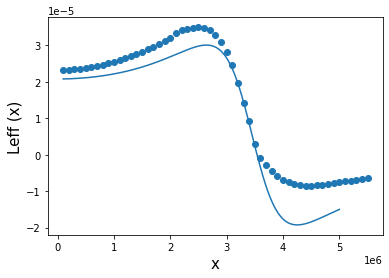

In [7]:
x_min = 100000
x_max = 5000000
N = 10000
x = np.linspace(x_min, x_max, N)
y = Leff(x)
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.plot(x,y)
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize =15)
plt.show()

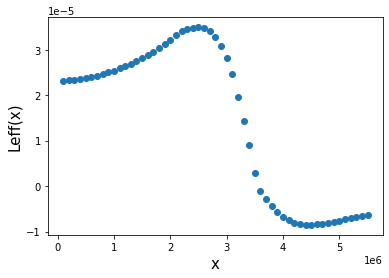

In [8]:
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.xlabel('x',fontsize=15)
plt.ylabel('Leff(x)',fontsize=15)
plt.show()

curve fitting optimaization
- Optimization and root finding (scipy.optimize)
    - https://docs.scipy.org/doc/scipy/reference/optimize.html<br>
- scipy.optimize.least_squares [.](http://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/15fit_data3.html)
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares

In [9]:
#measured data
xdata  = np.array(list_measured_value[0])
ydata = np.array(list_measured_value[1])

In [10]:
type(xdata)

numpy.ndarray

In [11]:
Lself

2.08e-05

In [12]:
#for Least squares method with scipy.optimize
def fit_func(parameter,x,y):
    Lself=2.08E-5
    Rs=1.2
    Rsol = parameter[0]
    Cself = parameter[1]
    residual = y - ((Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2))
    return residual

In [13]:
parameter0 = [0.,0.]
result = optimize.leastsq(fit_func,parameter0,args=(xdata,ydata))
print(result)
a_fit=result[0][0]
b_fit=result[0][1]

print(a_fit,b_fit)

(array([0., 0.]), 4)
0.0 0.0


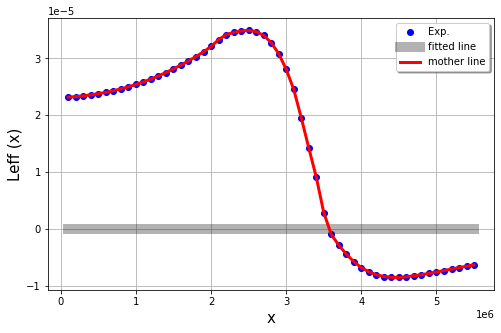

In [14]:
#PLot
plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'bo', label='Exp.')
plt.plot(xdata,a_fit*xdata+b_fit,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.plot(xdata,ydata,'r-', label='mother line', linewidth=3)
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize=15)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

scipy.optimize.curve_fit [.](https://qiita.com/kon2/items/6498e66af55949b41a99)
[.](https://qiita.com/hik0107/items/9bdc236600635a0e61e8)
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [15]:
from scipy.optimize import curve_fit

In [16]:
#for curve fit method with scipy.optimize
def func(x,a,b):
    Lself=2.08E-5
    Rs=1.2
    Rsol = a
    Cself = b
    y = (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)
    return y

In [17]:
initial_setting = []
initial_setting.append([1050,9.72E-11])

In [18]:
initial_setting

[[1050, 9.72e-11]]

In [19]:
#OLS
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_setting)
# popt, pcov = curve_fit(func, xdata, ydata) #OptimizeWarning
popt

array([9.15138657e+02, 9.18531694e-11])

In [20]:
print('Rsol : {}, Cself : {}'.format(Rsol,Cself))

Rsol : 1050, Cself : 9.72e-11


In [21]:
diff_Rsol = np.abs(Rsol - popt[0])
diff_Cself = np.abs(Cself - popt[1])
print('diff_Rsol : {}, diff_Cself : {}'.format(diff_Rsol,diff_Cself))

diff_Rsol : 134.8613431123582, diff_Cself : 5.346830577407073e-12


In [24]:
print('Rsol : {}, Cself : {}'.format(popt[0],popt[1]))

Rsol : 915.1386568876418, Cself : 9.185316942259293e-11


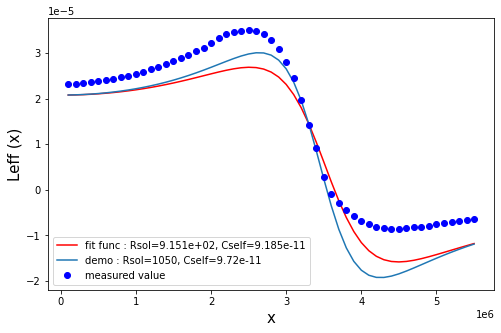

In [25]:
fig = plt.figure(figsize=(8,5))
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit func : Rsol=%5.3e, Cself=%5.3e' % tuple(popt))
plt.plot(xdata, func(xdata, Rsol,Cself),label='demo : Rsol=1050, Cself=9.72e-11')
plt.plot(xdata,ydata,'bo', label='measured value')
plt.xlabel('x',fontsize=15)
plt.ylabel('Leff (x)',fontsize=15)
plt.legend()
plt.show()

1/1000000くらい足せばもっとましになるんじゃね？

追記：

OriginProでも同様な結果が得られたので、この結果は間違えていないのだとも想定される。